In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import Normalizer

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Here for the purpose of starting analyzing the assignment we have to import various libraries like numpy, pandas, seaborn, matplotlib etc. Next we have loaded the breast cancer dataset from sclearn, and have printed the head of the dataset.

In [2]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

Now we will start our analysis by first checking if the dataset contains any null values or not.<br> 
Here we are able to assess that there is no null/missing vales in the dataset.

In [3]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

Here we have defined the variable X and the variable Y and have defined data in them.

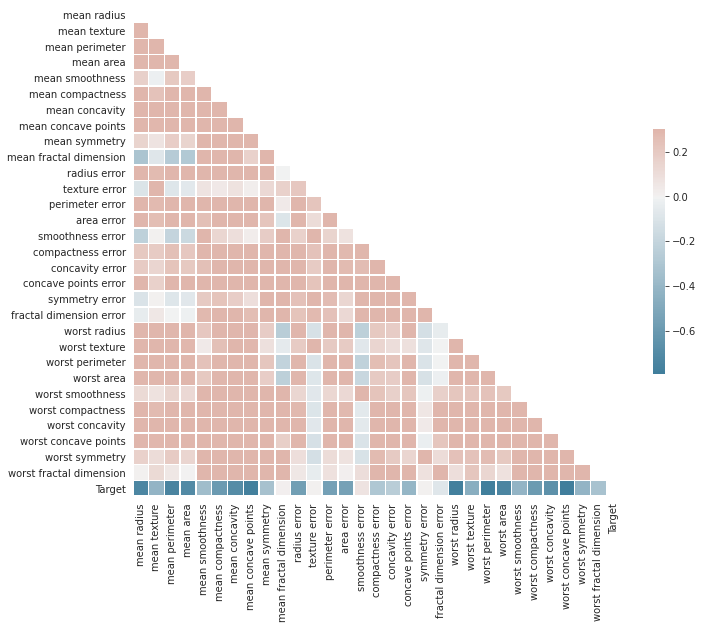

In [4]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We have defined the variable name corr which contains the correlation of the entire dataset. Then we have setup the matplotlib
figure for generating the heatmap. Then we generated a custom diverging colormap as per the specifications. Then we have created a heatmap with the mask and correct aspect ratio. From this heat map we were able to analyze that there were some featurs were positively and some variable negatively correlated with each other.

In [14]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Target'],
      dtype='object')

Using this command above we were able to see the column heading from the above dataset.

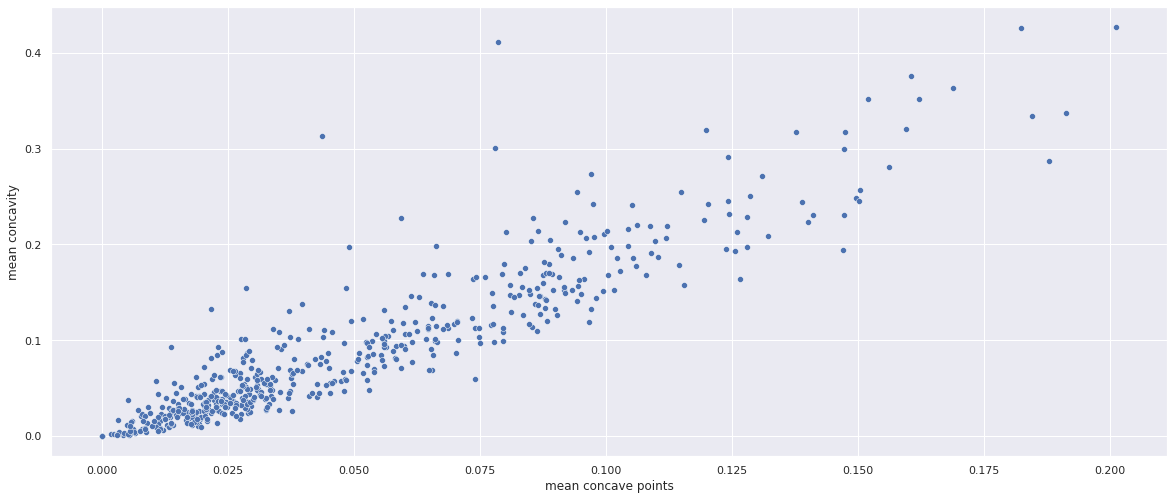

In [15]:
sns.scatterplot(data=df, x="mean concave points", y="mean concavity")
plt.show()

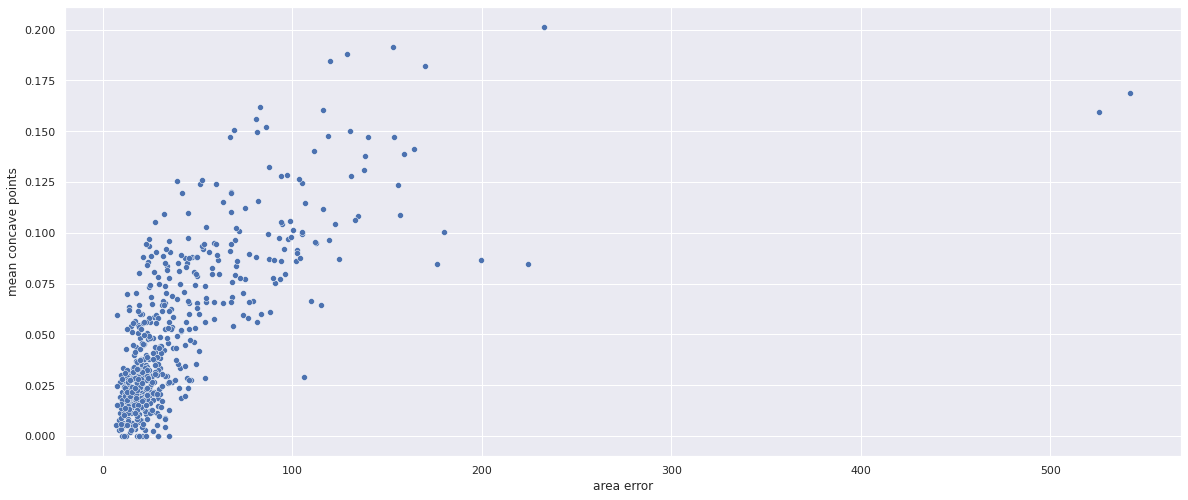

In [16]:
sns.scatterplot(data=df, x="area error", y="mean concave points")
plt.show()

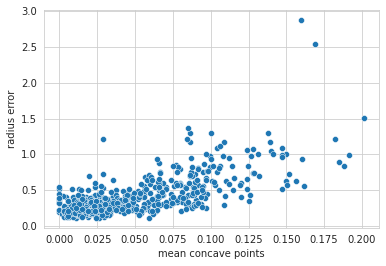

In [8]:
sns.scatterplot(data=df, x="mean concave points", y="radius error")
plt.show()

After analyzing the above heatmap, we were able to analyze some of the variable those were highly correlated. From identifying those variable we created a scatter plot from those variable. The variable are as follows,
1) x="mean concave points", y="mean concavity"<br>
2) x="area error", y="mean concave points"<br>
3) x="mean concave points", y="radius error"<br>

In [17]:
data_without_outlier_no = df[(np.abs(stats.zscore(df)) < 1).all(axis=1)]

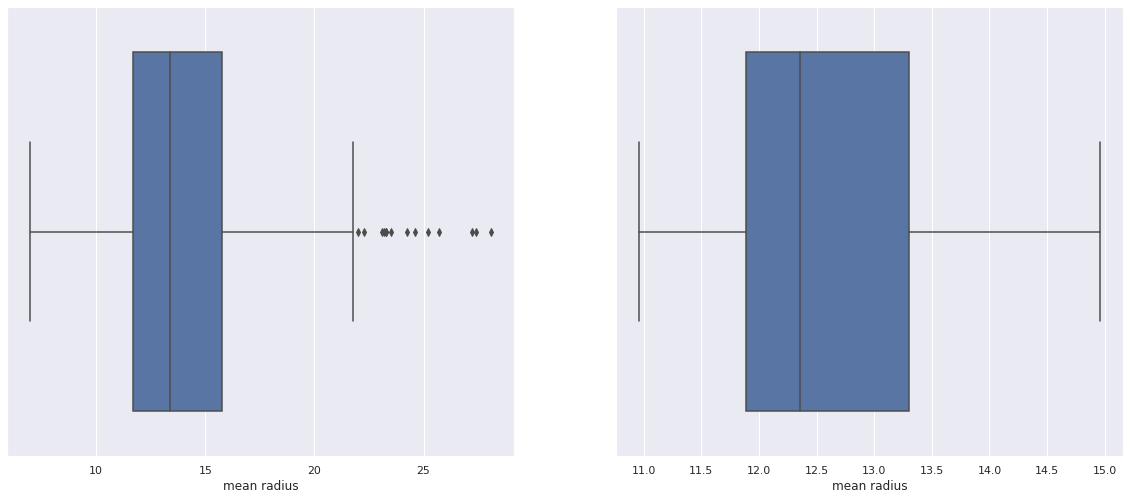

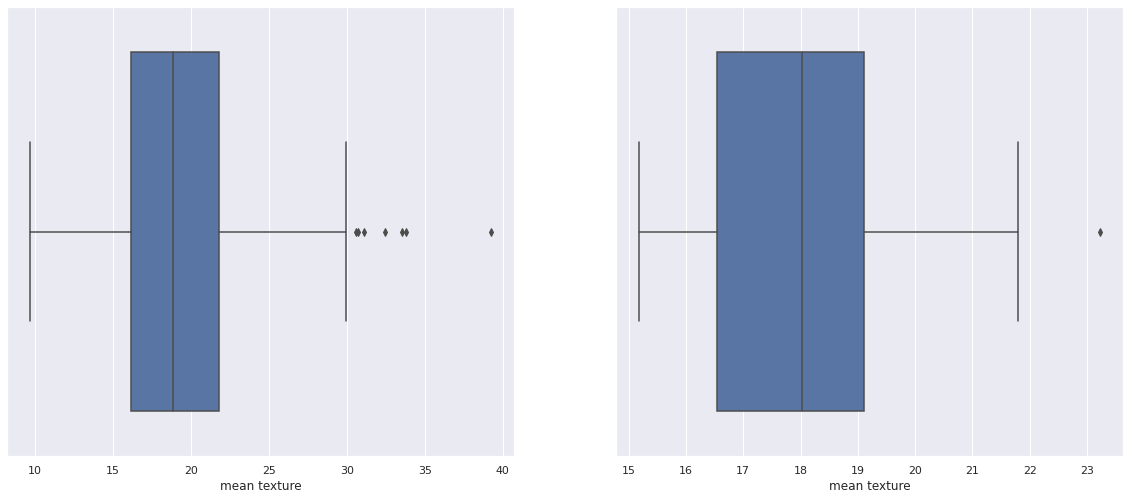

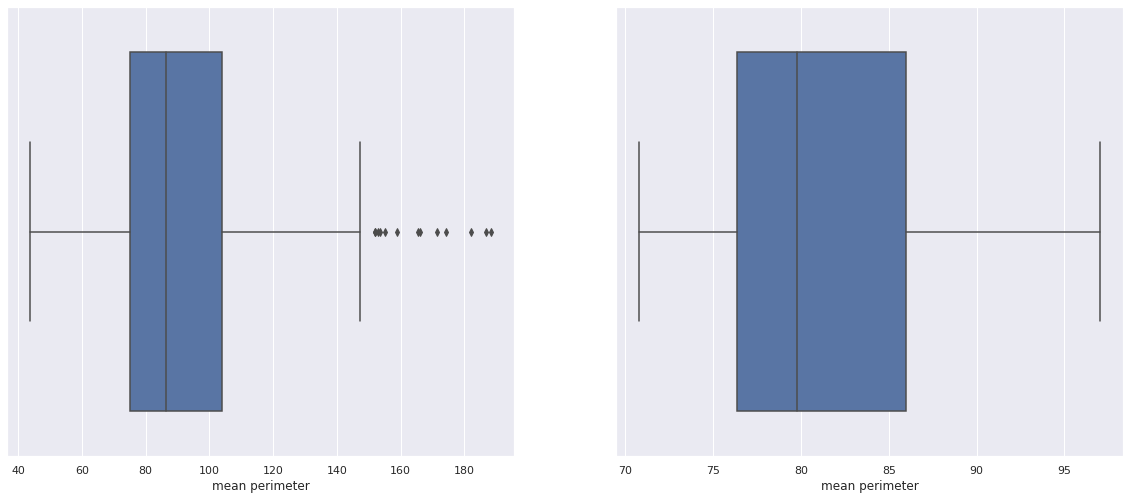

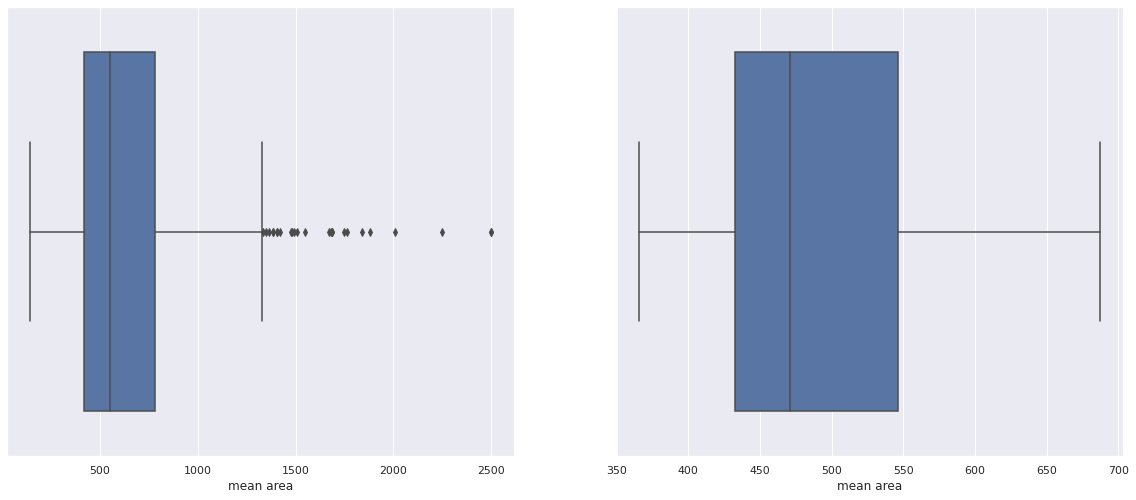

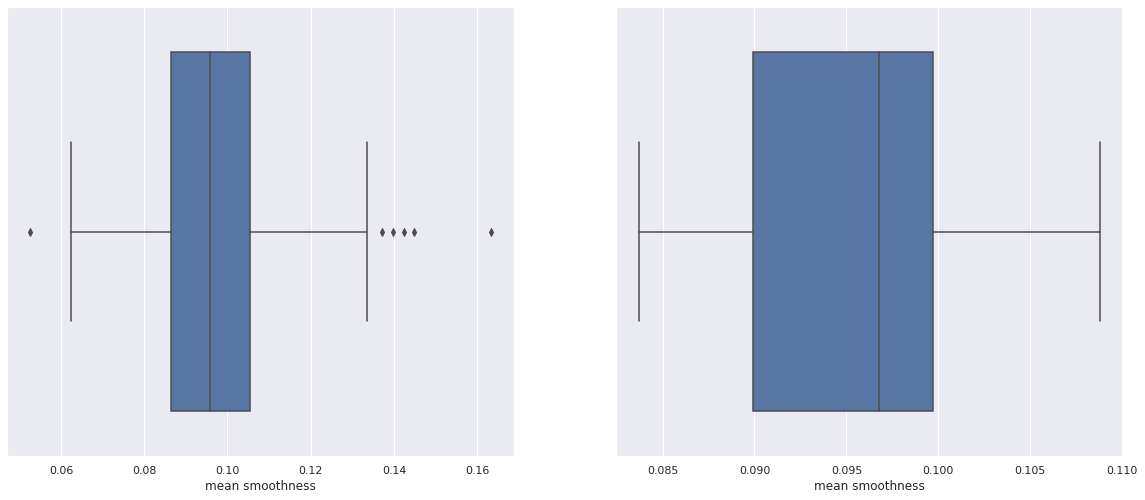

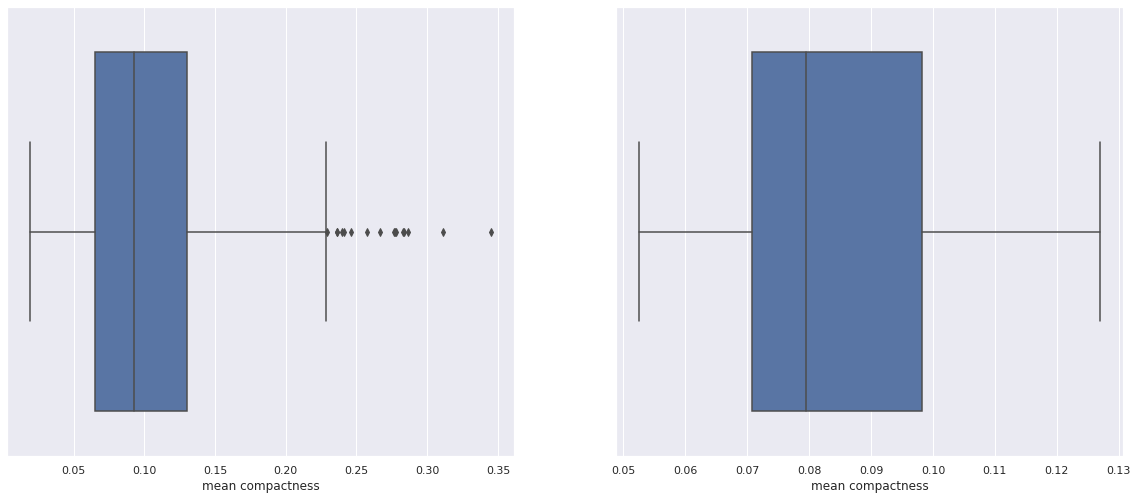

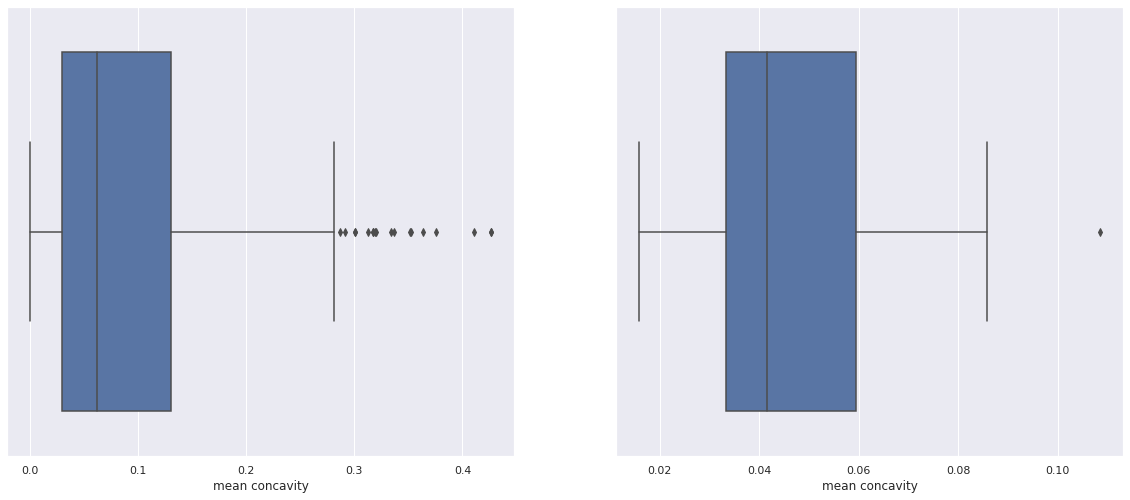

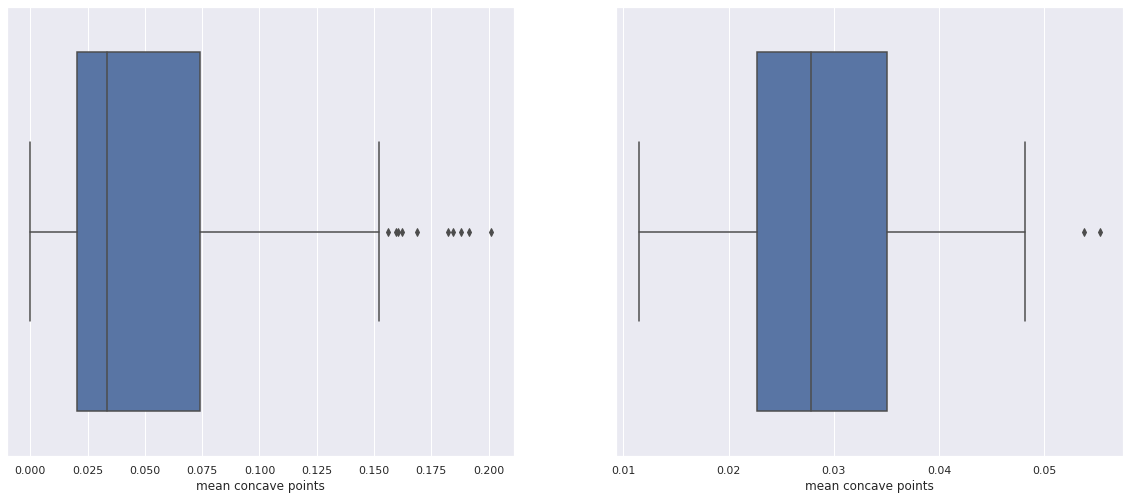

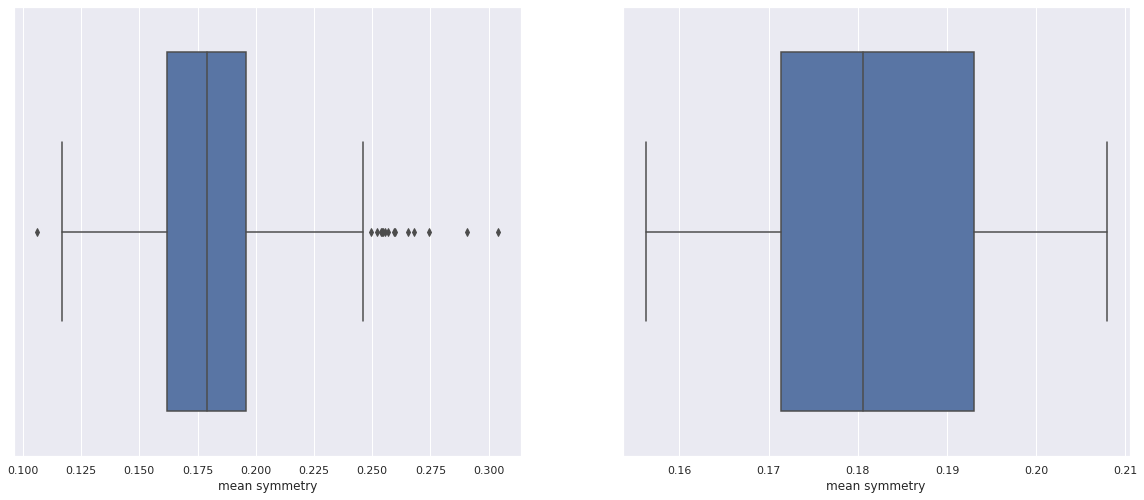

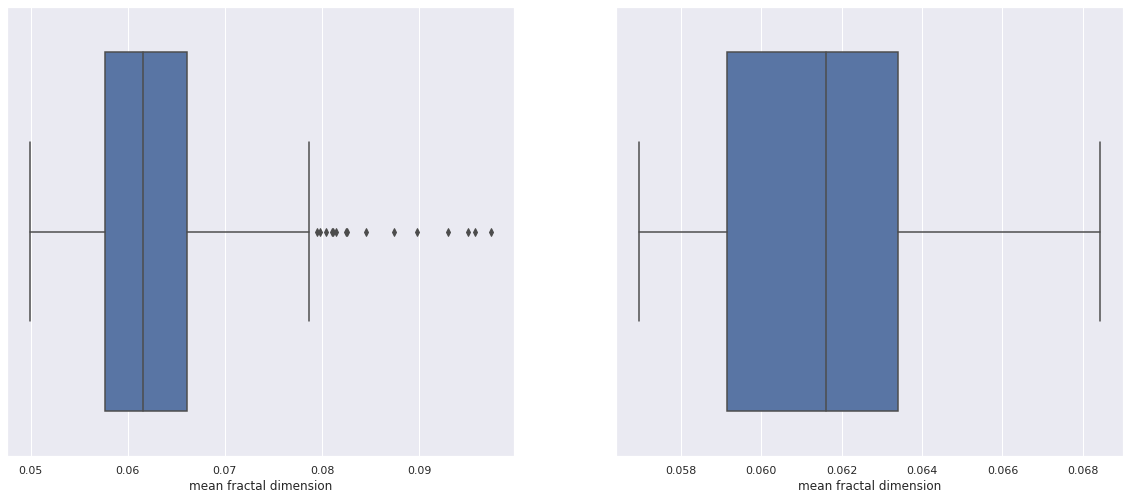

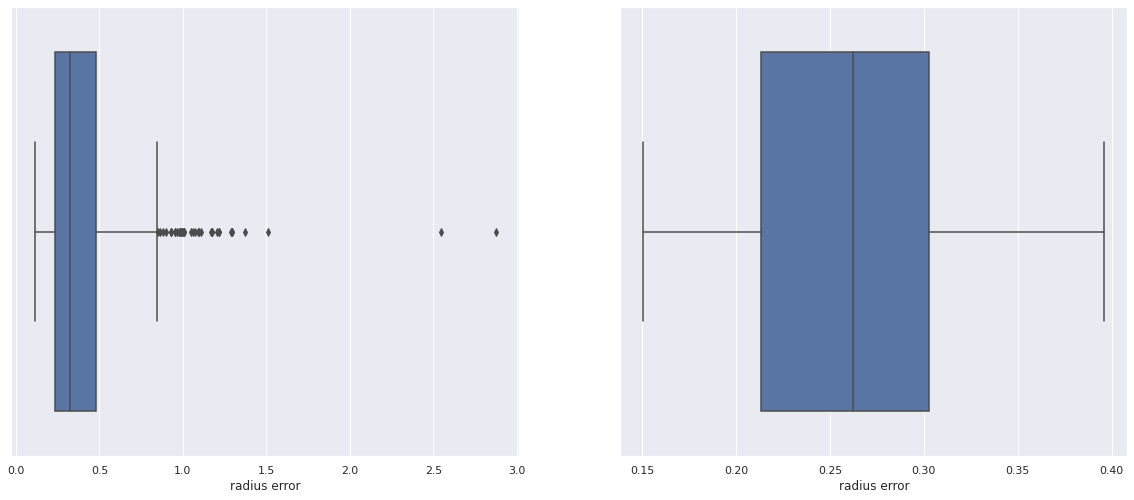

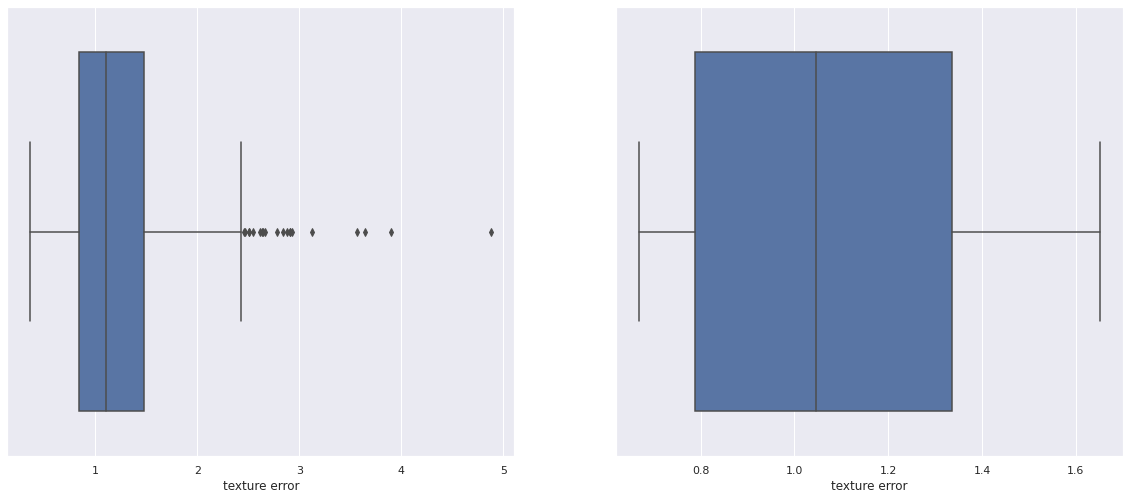

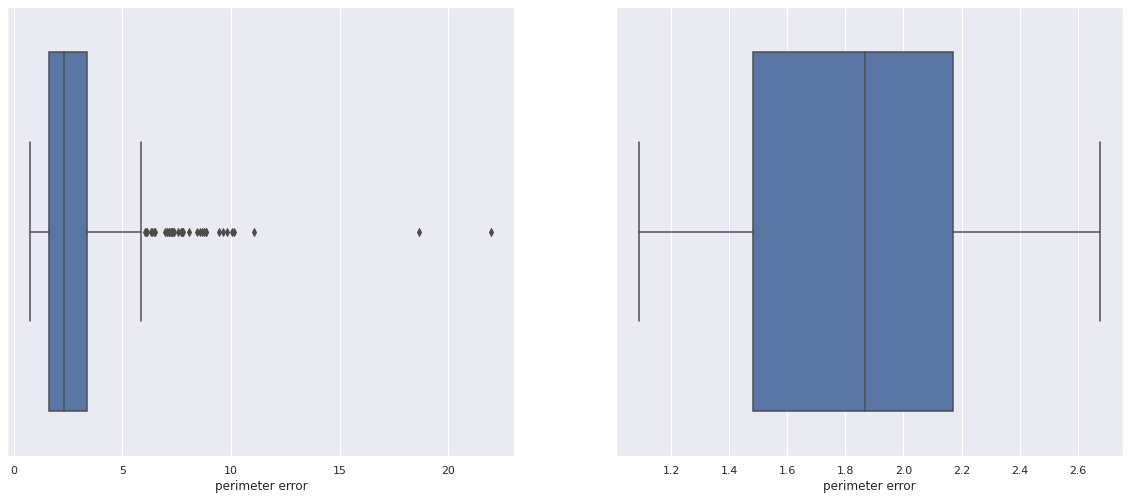

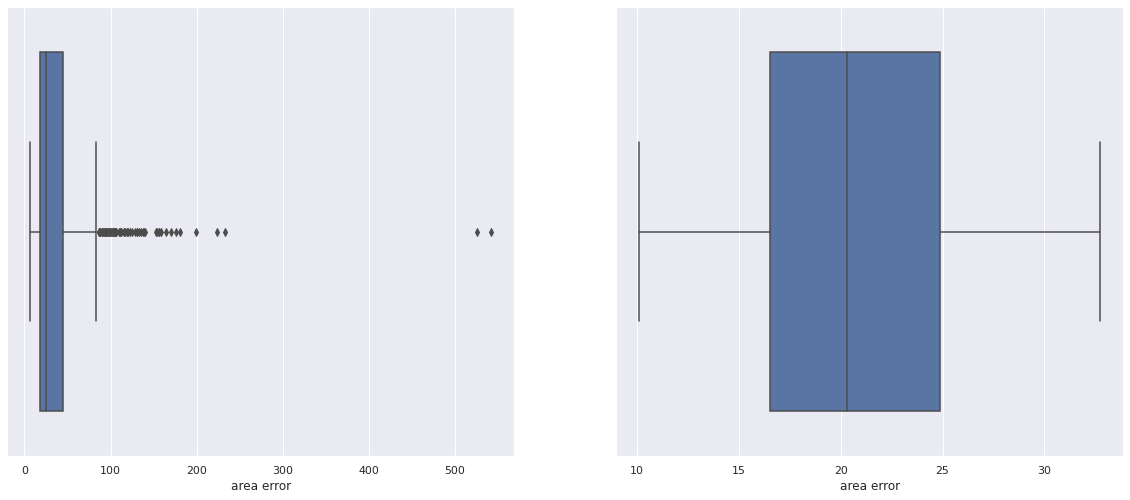

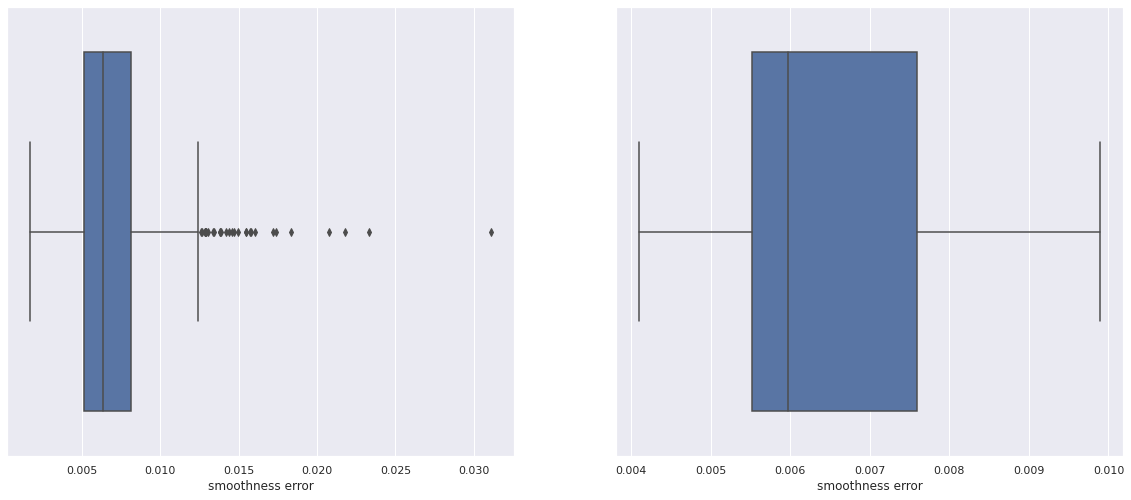

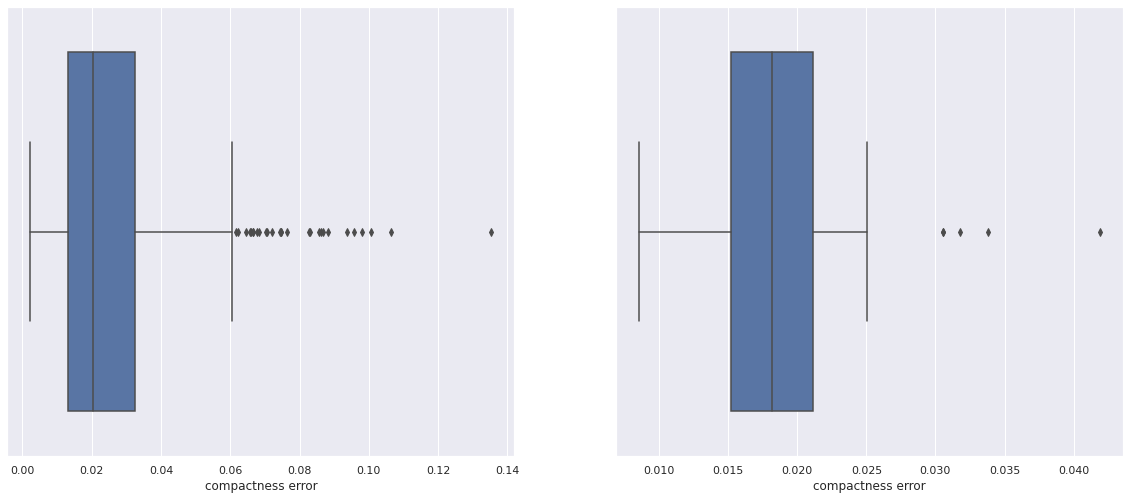

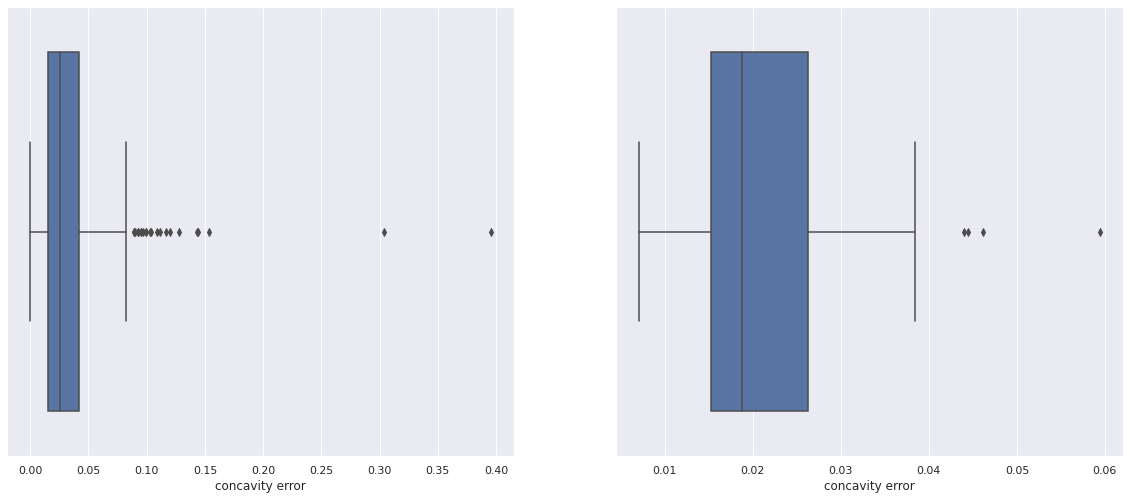

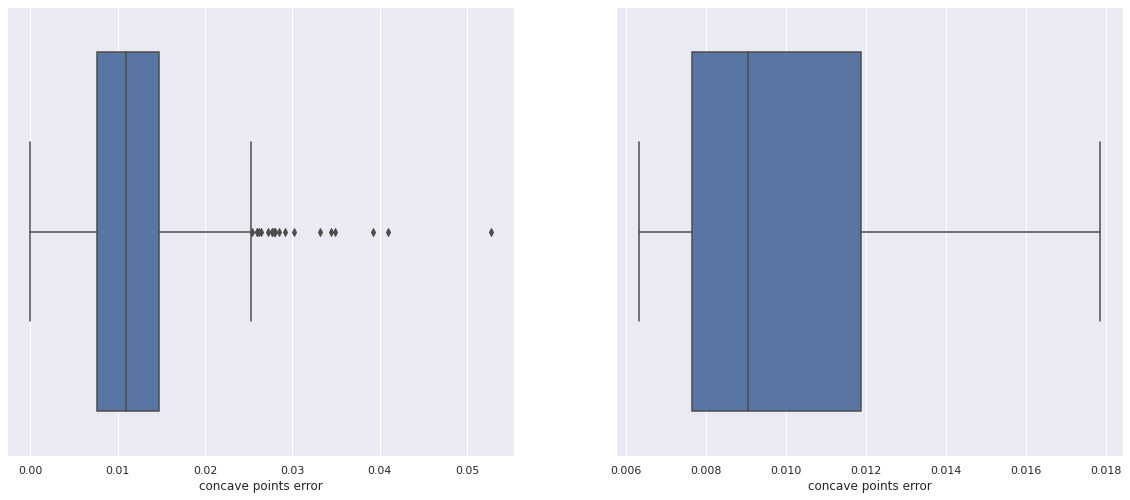

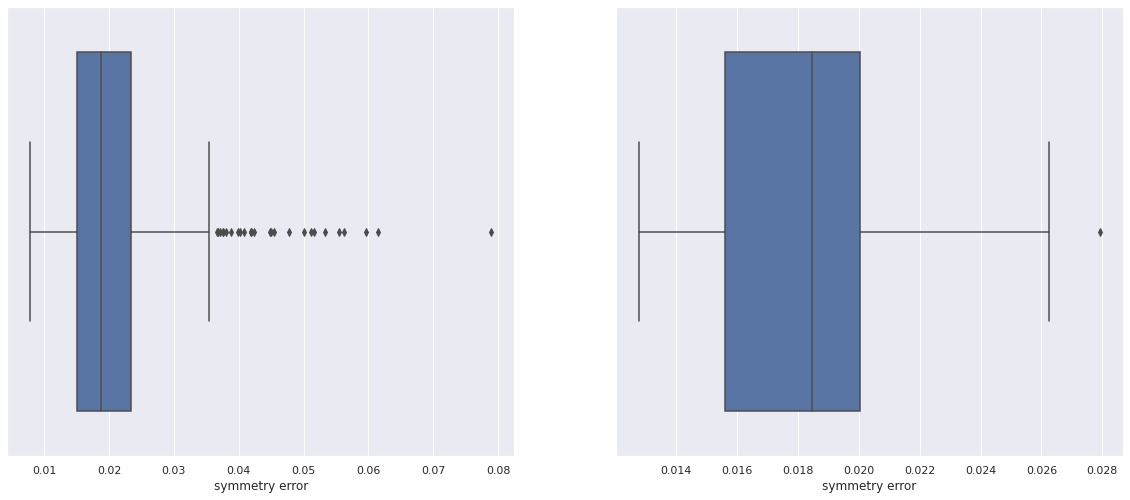

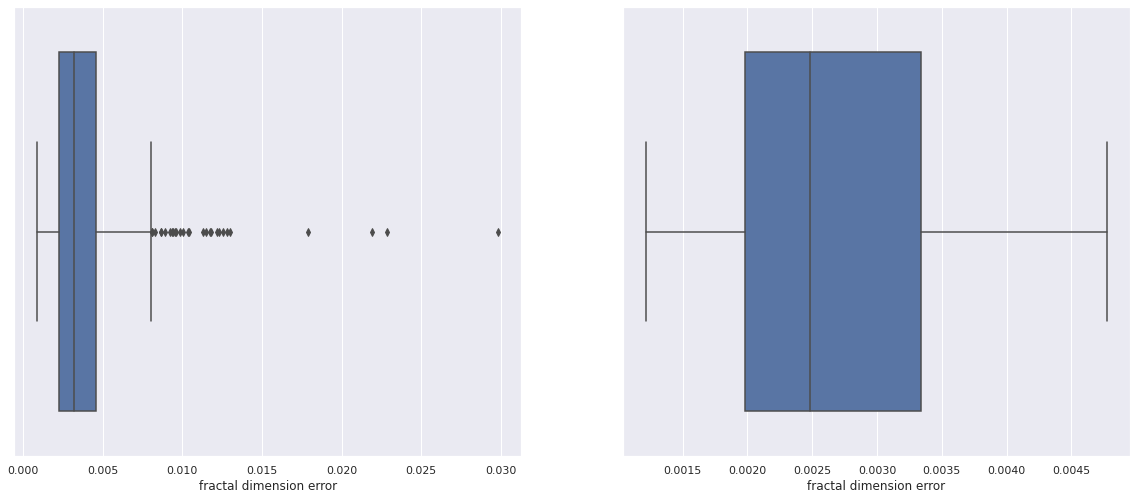

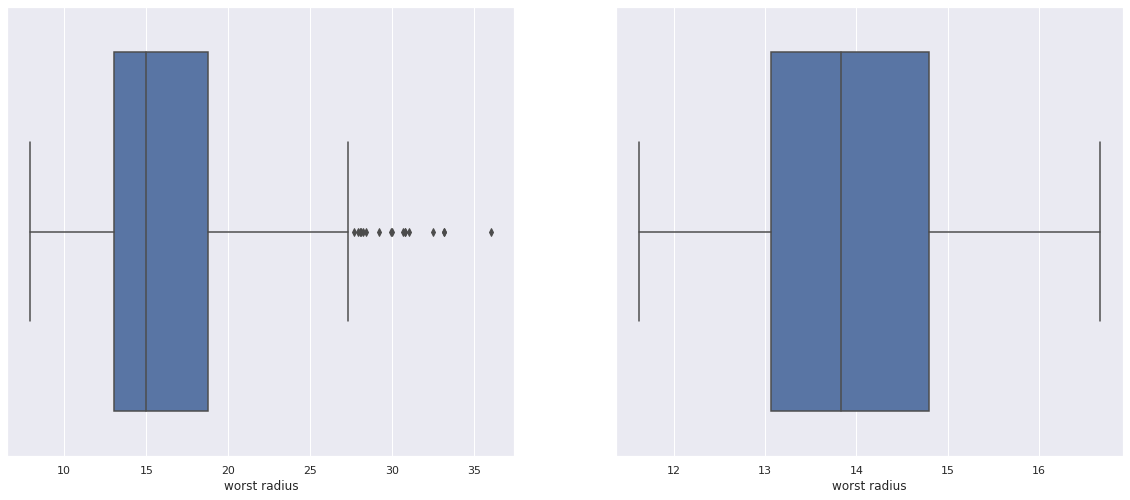

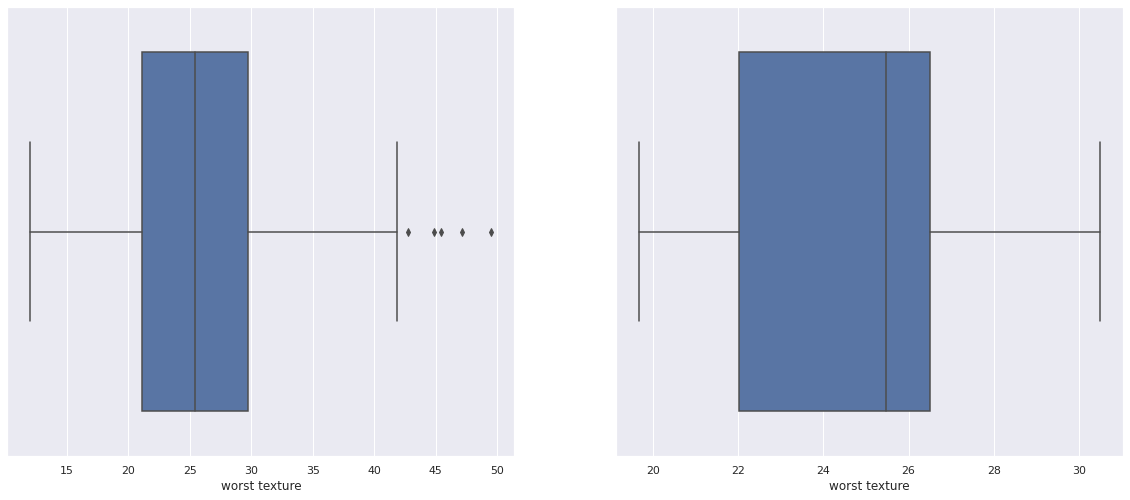

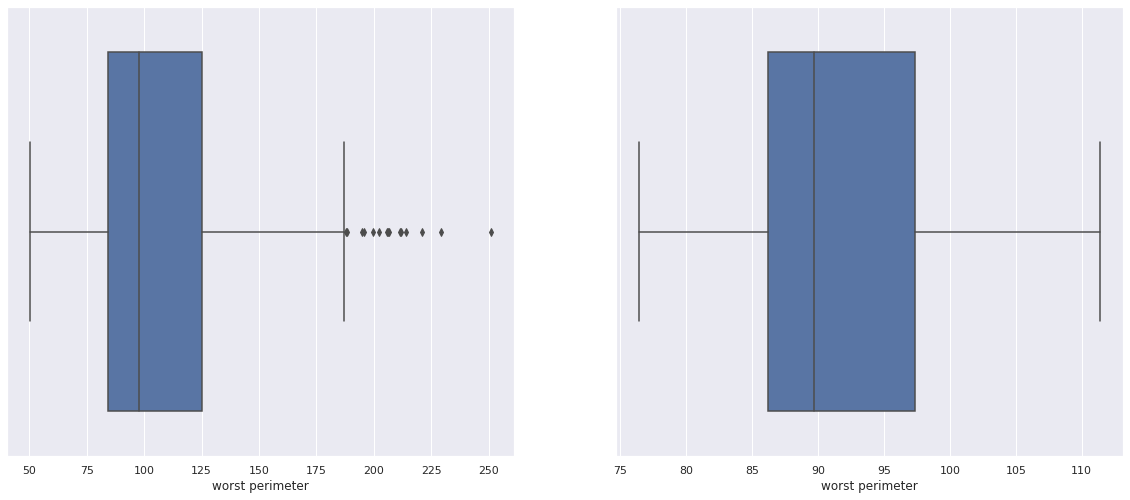

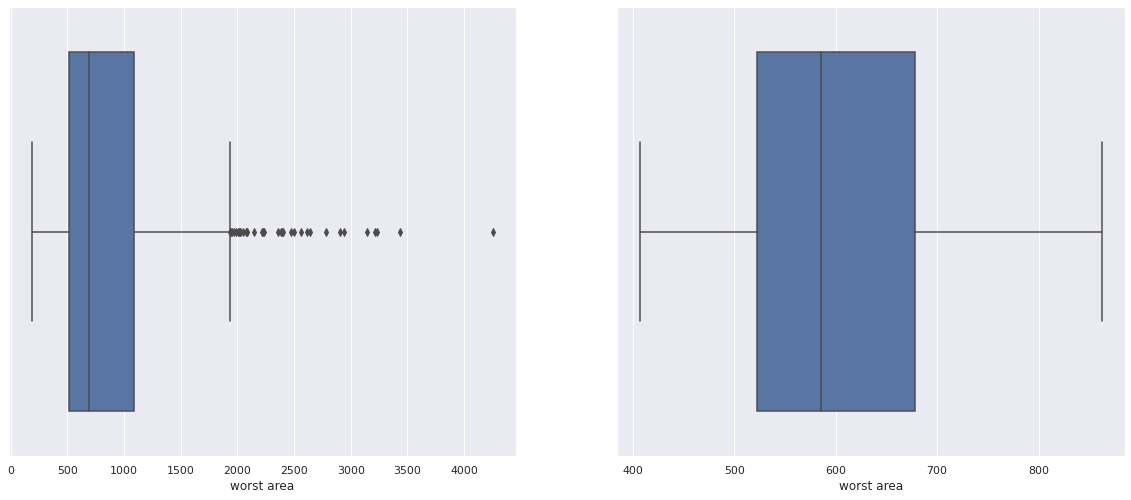

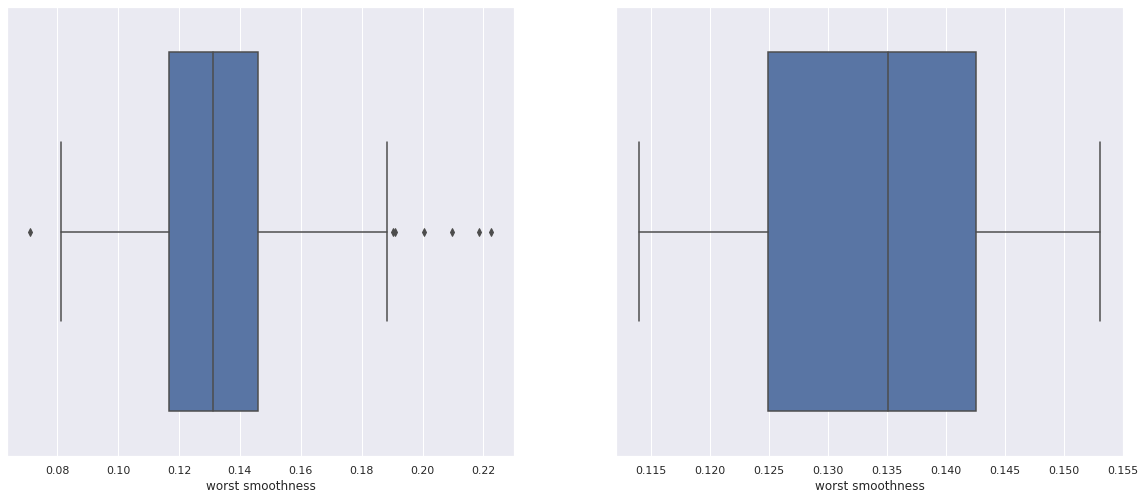

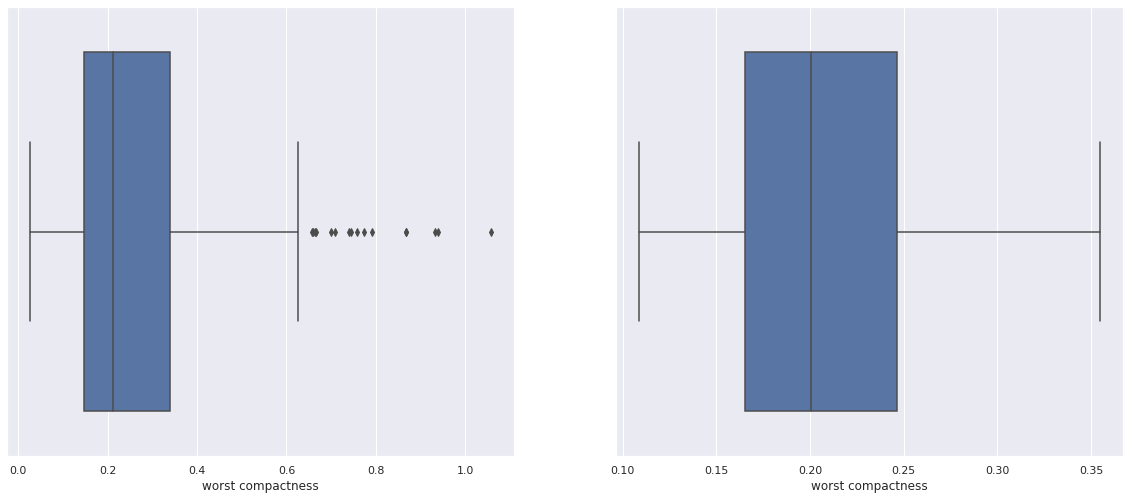

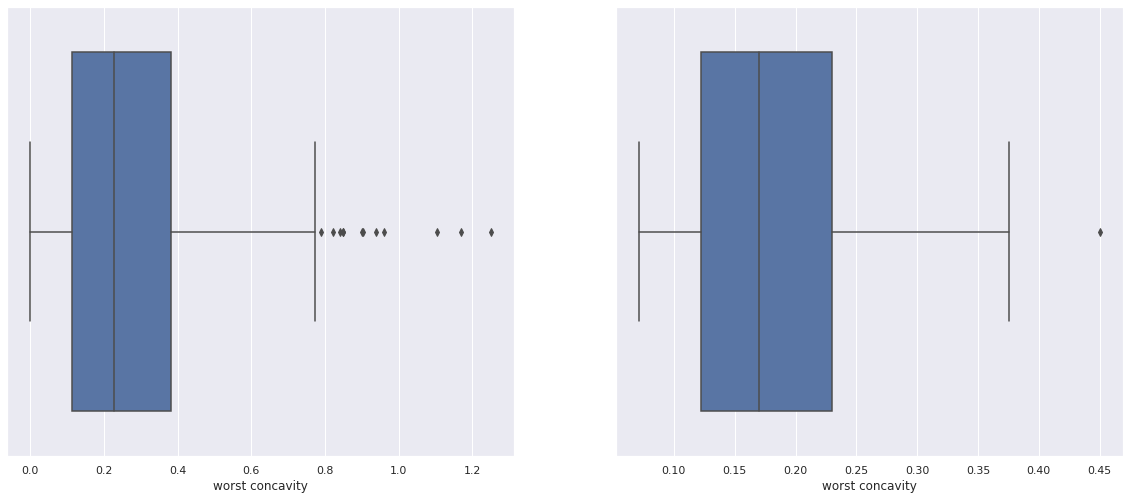

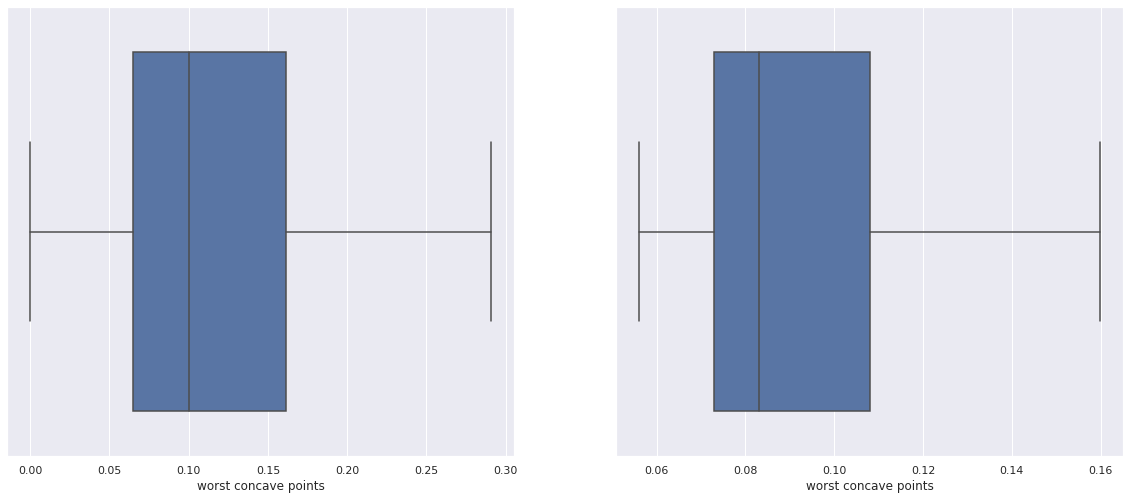

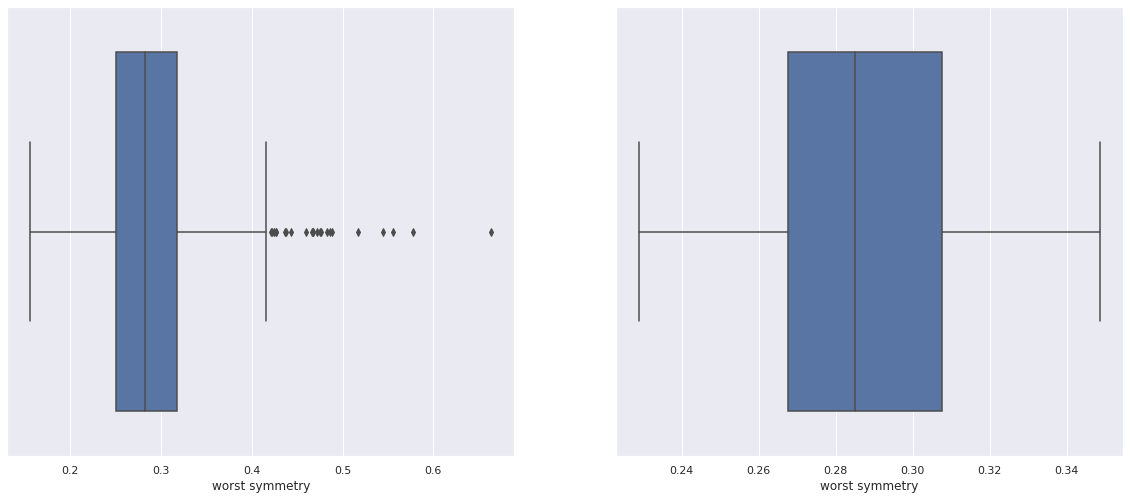

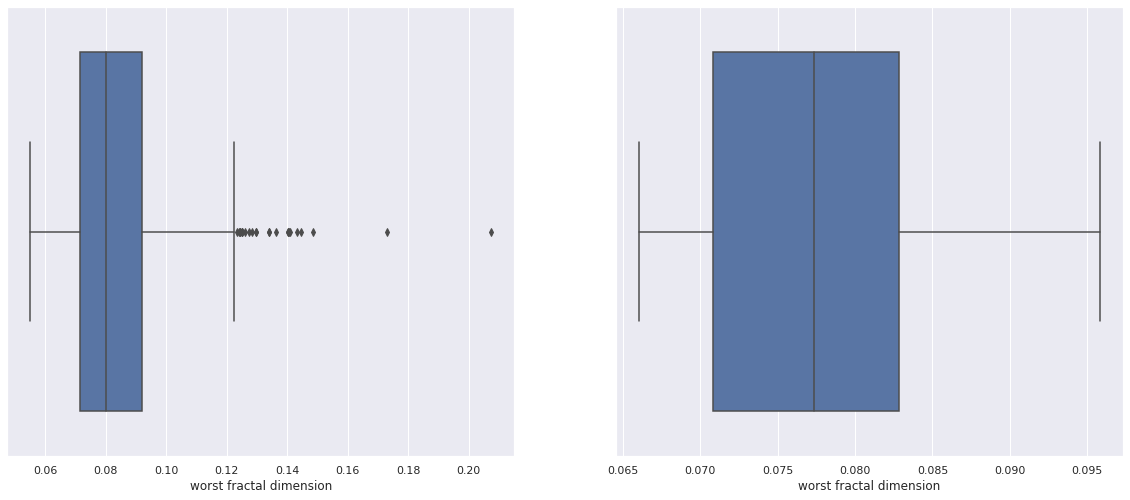

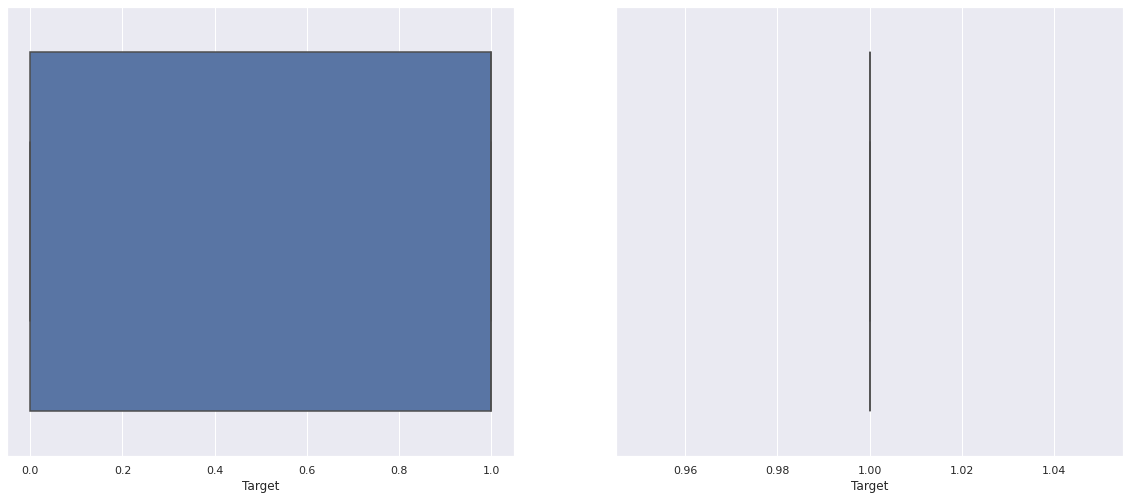

In [18]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,8.27)})
for column in df.columns:
    
    fig, ax =plt.subplots(1,2)
    sns.boxplot(df[column],ax=ax[0],palette="deep")
    sns.boxplot(data_without_outlier_no[column], ax=ax[1], palette="deep")
    fig.show()

Here we have created boxplots. The first column containg boxplots of are of all the features in the original dataset and the boxplots in the second column are after removing the outliers from the datset. We were able to analyze, that we were able to remove majority of the outliers from the dataset.

In [19]:
normalizer = Normalizer()
df_normalized = df.copy()
df_normalized[df_normalized.columns]=normalizer.fit_transform(df_normalized)
df_normalized

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052,0.000000
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038,0.000000
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042,0.000000
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247,0.000000
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.008541,0.008870,0.056256,0.585933,0.000044,0.000046,0.000097,0.000055,0.000068,0.000022,0.000466,0.000498,0.003040,0.062872,0.000004,0.000011,0.000021,0.000010,0.000004,0.000002,0.010082,0.010459,0.065804,0.803033,0.000056,0.000084,0.000163,0.000088,0.000082,0.000028,0.000000
565,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,0.000026,0.000355,0.001143,0.002415,0.045974,0.000003,0.000011,0.000018,0.000008,0.000009,0.000001,0.010997,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031,0.000000
566,0.011644,0.019696,0.075966,0.601905,0.000059,0.000072,0.000065,0.000037,0.000112,0.000040,0.000320,0.000754,0.002402,0.034055,0.000004,0.000026,0.000033,0.000011,0.000009,0.000003,0.013313,0.023933,0.088872,0.788417,0.000080,0.000217,0.000239,0.000099,0.000156,0.000055,0.000000
567,0.009230,0.013142,0.062774,0.566806,0.000053,0.000124,0.000157,0.000068,0.000107,0.000031,0.000325,0.000715,0.002586,0.038632,0.000003,0.000028,0.000032,0.000007,0.000010,0.000003,0.011533,0.017663,0.082713,0.815932,0.000074,0.000389,0.000421,0.000119,0.000183,0.000056,0.000000


Here Normalization has been performed by Z_score method for Feature Scaling. In order to perform the normalization we have transformed the entire distribution to distribution with mean 0 and Standard deviation 1. This helped us to perform training faster and made algorithm outliers robust. 